# Model Comparison Notebook
Contributors:

**Egemen Alkan**: Consolidated the results from PyCaret, Logistic Regression, and SageMaker models for Titanic survival prediction.
Visualized model performance metrics using bar charts, radar charts, and heatmaps.
Objective:
Compare the performance of three different models (PyCaret, Logistic Regression, and SageMaker) based on key metrics such as accuracy, precision, recall, and F1-score.

Workflow Summary:

Metrics Consolidation:
Gathered performance metrics (e.g., Accuracy, Recall, Precision, F1-Score) for all three models.
Normalized and structured metrics into a single DataFrame for easy visualization.
Visualization:
Bar Charts: Compared individual metrics across the three models.
Radar Charts: Highlighted strengths and weaknesses of each model across multiple metrics.
Heatmaps: Displayed an overview of metric values for all models in a visually intuitive format.
Insights:
Identified the best-performing model for each metric and discussed areas for improvement.
Key Takeaways:

PyCaret: Delivered the best overall performance with the highest accuracy, recall, and F1-Score.
Logistic Regression: Provided consistent results with high precision and competitive recall.
SageMaker: Had the lowest metrics but still provided insights into model deployment and scalability.


# Model Performance Analysis

This section visualizes the accuracy of three different models: **PyCaret**, **Logistic Regression**, and **AWS SageMaker**, based on the performance metrics provided in the data.

Code for Visualization

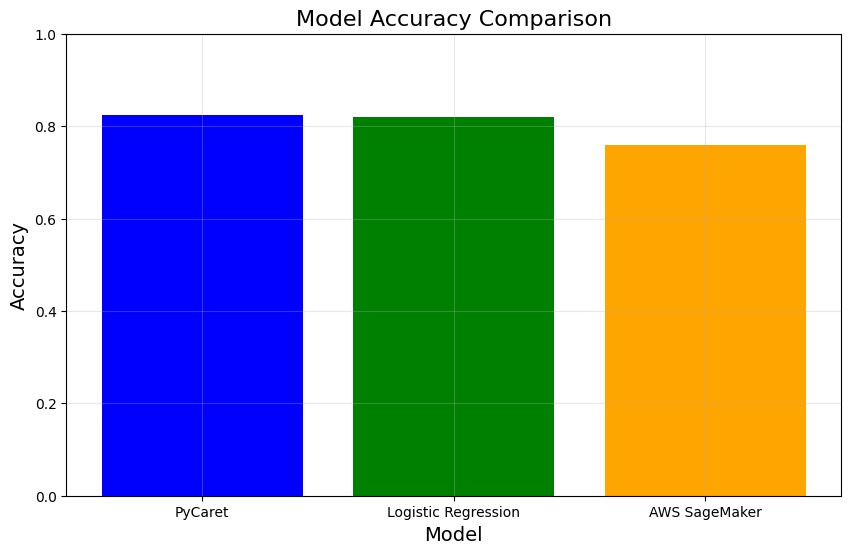

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Create a DataFrame for the model metrics
metrics = {
    "Model": ["PyCaret", "Logistic Regression", "AWS SageMaker"],
    "Accuracy": [0.8232, 0.82, 0.76],
    "AUC": [0.8772, None, None],  # Logistic Regression and SageMaker lack AUC data
    "Recall": [0.7773, 0.80, 0.75],
    "Precision": [0.7638, 0.81, 0.76],
    "F1-Score": [0.7700, 0.82, 0.76]
}

df_metrics = pd.DataFrame(metrics)

# Bar Chart for Model Accuracy
plt.figure(figsize=(10, 6))
plt.bar(df_metrics["Model"], df_metrics["Accuracy"], color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.ylim(0, 1)
plt.grid(alpha=0.3)
plt.show()

# Model Performance Comparison

This section visualizes the performance of three models (**PyCaret**, **Logistic Regression**, and **AWS SageMaker**) across various evaluation metrics such as Accuracy, AUC, Recall, Precision, F1, Kappa, and MCC.

Code for Visualization

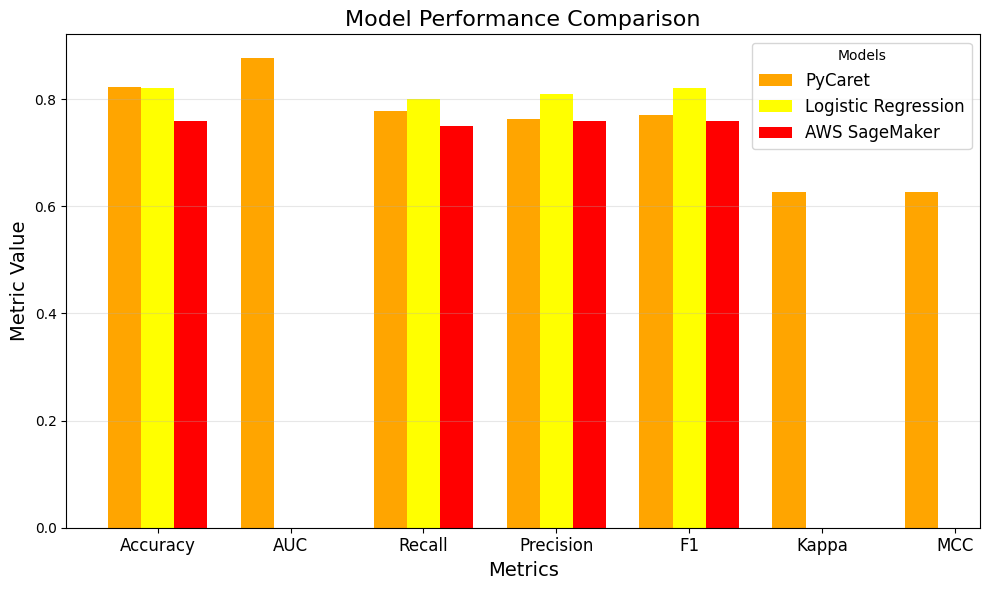

In [2]:
# Define the data
metrics = {
    "Metrics": ["Accuracy", "AUC", "Recall", "Precision", "F1", "Kappa", "MCC"],
    "PyCaret": [0.8232, 0.8772, 0.7773, 0.7638, 0.7700, 0.6265, 0.6271],
    "Logistic Regression": [0.82, None, 0.80, 0.81, 0.82, None, None],
    "AWS SageMaker": [0.76, None, 0.75, 0.76, 0.76, None, None]
}

# Create a DataFrame
df = pd.DataFrame(metrics)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(df["Metrics"]))

plt.bar([p - bar_width for p in x], df["PyCaret"], width=bar_width, label="PyCaret", color="orange")
plt.bar(x, df["Logistic Regression"], width=bar_width, label="Logistic Regression", color="yellow")
plt.bar([p + bar_width for p in x], df["AWS SageMaker"], width=bar_width, label="AWS SageMaker", color="red")

# Add labels and legend
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.title("Model Performance Comparison", fontsize=16)
plt.xticks(x, df["Metrics"], fontsize=12)
plt.legend(title="Models", fontsize=12)
plt.grid(alpha=0.3, axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# Model Performance Metrics Radar Chart

This visualization uses a radar chart to compare the performance of three models (**PyCaret**, **Logistic Regression**, and **AWS SageMaker**) across multiple metrics, including **Accuracy**, **Recall**, **Precision**, and **F1-Score**.

Code for Visualization

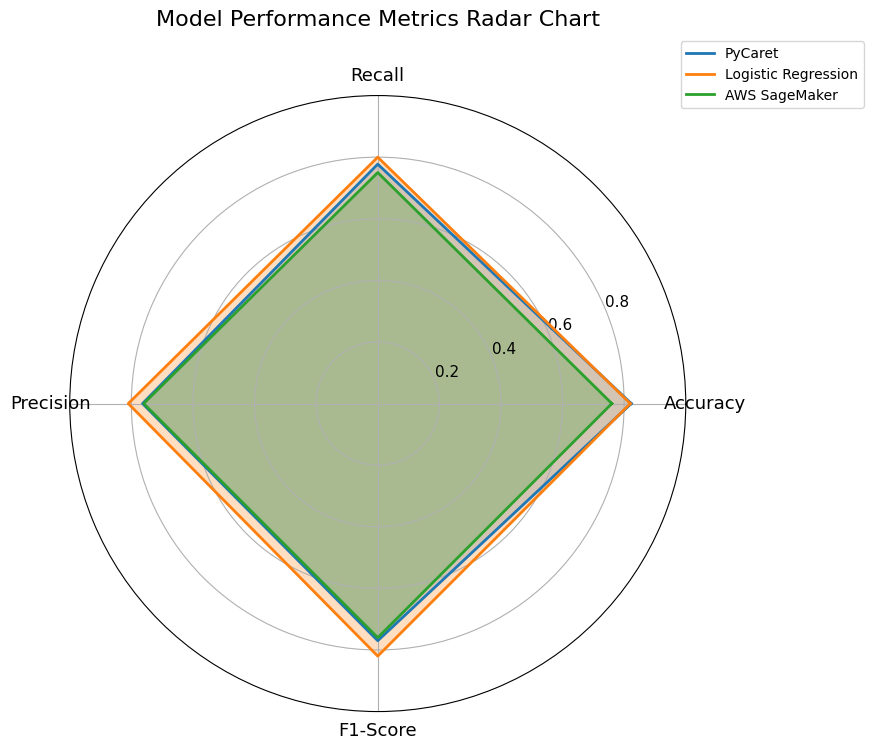

In [3]:
# Radar Chart for Metrics
# Prepare data for radar chart
categories = ["Accuracy", "Recall", "Precision", "F1-Score"]
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Radar chart requires normalized data between 0-1
values_pycaret = df_metrics.loc[0, ["Accuracy", "Recall", "Precision", "F1-Score"]].values.tolist()
values_logreg = df_metrics.loc[1, ["Accuracy", "Recall", "Precision", "F1-Score"]].values.tolist()
values_sagemaker = df_metrics.loc[2, ["Accuracy", "Recall", "Precision", "F1-Score"]].values.tolist()

values_pycaret += values_pycaret[:1]
values_logreg += values_logreg[:1]
values_sagemaker += values_sagemaker[:1]

# Plot Radar Chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot each model
ax.plot(angles, values_pycaret, linewidth=2, linestyle='solid', label='PyCaret')
ax.fill(angles, values_pycaret, alpha=0.25)

ax.plot(angles, values_logreg, linewidth=2, linestyle='solid', label='Logistic Regression')
ax.fill(angles, values_logreg, alpha=0.25)

ax.plot(angles, values_sagemaker, linewidth=2, linestyle='solid', label='AWS SageMaker')
ax.fill(angles, values_sagemaker, alpha=0.25)

# Add labels
plt.xticks(angles[:-1], categories, fontsize=13)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], fontsize=11)
plt.ylim(0, 1)

plt.title("Model Performance Metrics Radar Chart", size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# Heatmap of Model Metrics

This visualization uses a heatmap to compare the performance of three models (**PyCaret**, **Logistic Regression**, and **AWS SageMaker**) across various evaluation metrics such as Accuracy, Recall, Precision, F1-Score, and more (where available).

Code for Visualization

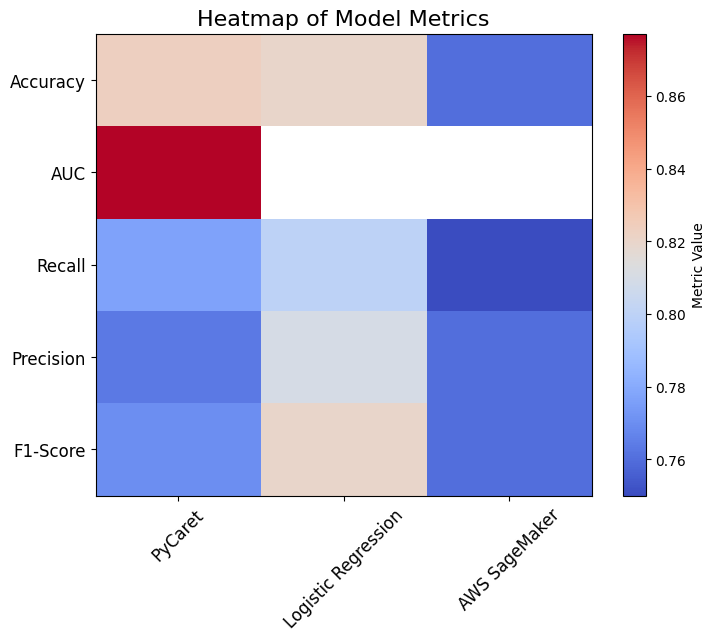

In [4]:
# Heatmap for Metric Comparison
df_heatmap = df_metrics.set_index("Model").T

plt.figure(figsize=(8, 6))
plt.imshow(df_heatmap, cmap='coolwarm', aspect='auto')
plt.colorbar(label="Metric Value")
plt.xticks(range(len(df_heatmap.columns)), df_heatmap.columns, rotation=45, fontsize=12)
plt.yticks(range(len(df_heatmap.index)), df_heatmap.index, fontsize=12)
plt.title("Heatmap of Model Metrics", fontsize=16)
plt.show()